In [2]:
# Membaca library awal
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Membaca data
df = pd.read_csv('dataset/3. Loan Approval.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
# Memisahkan kolom numbers dan kategori
numbers = df.select_dtypes(include=['number']).drop(columns=['loan_status']).columns
categories = df.select_dtypes(exclude = ['number']).columns

In [6]:
round(df.describe(),2)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00
mean,27.76,80319.05,5.41,9583.16,11.01,0.14,5.87,632.61,0.22
std,6.05,80422.50,6.06,6314.89,2.98,0.09,3.88,50.44,0.42
min,20.00,8000.00,0.00,500.00,5.42,0.00,2.00,390.00,0.00
25%,24.00,47204.00,1.00,5000.00,8.59,0.07,3.00,601.00,0.00
50%,26.00,67048.00,4.00,8000.00,11.01,0.12,4.00,640.00,0.00
75%,30.00,95789.25,8.00,12237.25,12.99,0.19,8.00,670.00,0.00
max,144.00,7200766.00,125.00,35000.00,20.00,0.66,30.00,850.00,1.00


In [7]:
df[categories].describe(include = 'all')

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


In [8]:
numbers

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score'],
      dtype='object')

In [9]:
categories

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

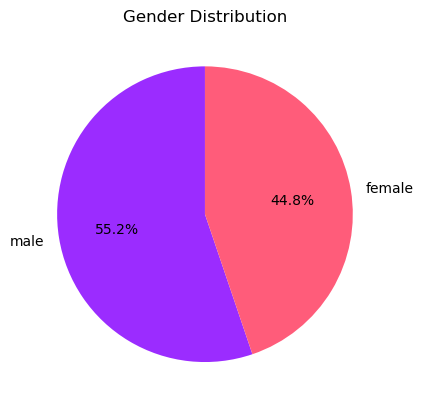

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Distribusi Gender

df['person_gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#9b2cff','#ff5c7a'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

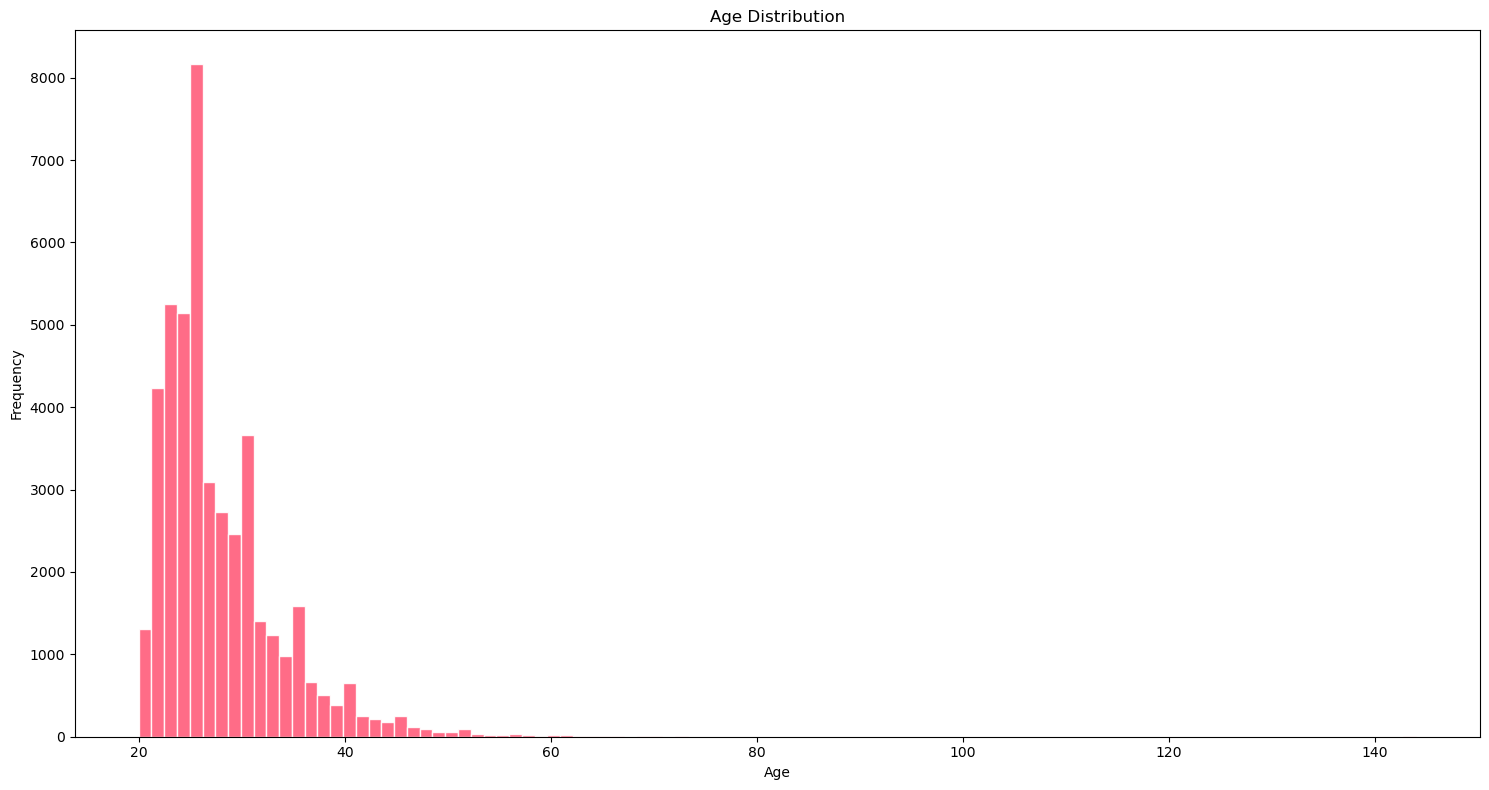

In [13]:
#Distribusi Umur

plt.figure(figsize=(15,8))
plt.hist(df["person_age"].dropna(),bins=100,color='#ff5c7a',edgecolor='white',
    alpha=0.9)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

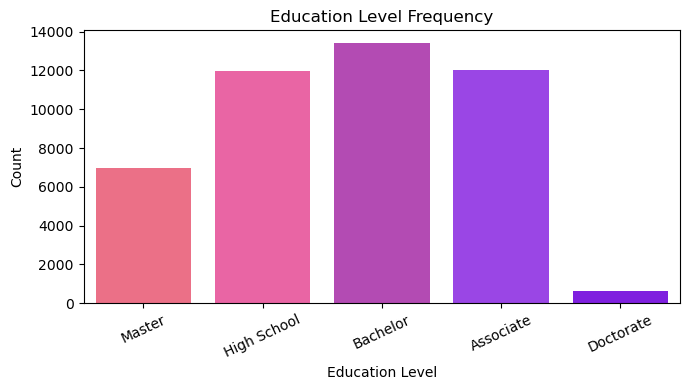

In [14]:
# Frekuensi Level Pendidikan

# custom neon pink–purple palette
neon_palette = ['#ff5c7a','#ff4fa3','#c43ac4','#9b2cff','#7f00ff']

plt.figure(figsize=(7,4))
sns.countplot(data=df,x='person_education',palette=neon_palette)
plt.title("Education Level Frequency")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

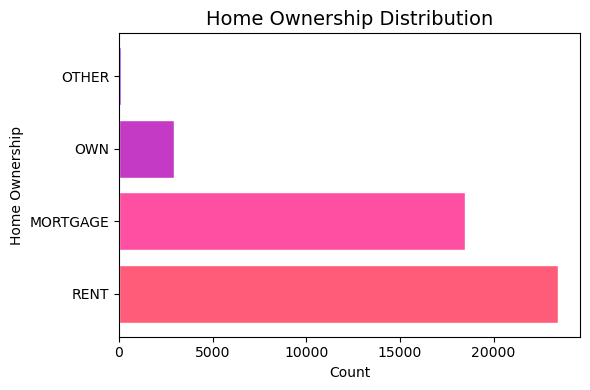

In [15]:
# Distribusi Kepemilikan Rumah

home_counts = df['person_home_ownership'].value_counts()
palette = ['#ff5c7a', '#ff4fa3', '#c43ac4', '#9b2cff', '#7f00ff']

plt.figure(figsize=(6,4))
plt.barh(home_counts.index,home_counts.values,color=palette[:len(home_counts)],edgecolor='white')
plt.title("Home Ownership Distribution", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Home Ownership")
plt.tight_layout()
plt.show()

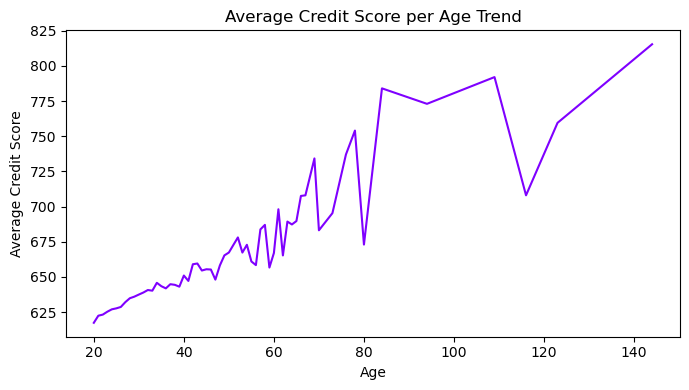

In [16]:
# Tren Credit Score per Umur

age_credit = df.groupby("person_age")["credit_score"].mean().sort_index()

plt.figure(figsize=(7,4))
plt.plot(age_credit.index, age_credit.values, color = '#7f00ff')
plt.title("Average Credit Score per Age Trend")
plt.xlabel("Age")
plt.ylabel("Average Credit Score")
plt.tight_layout()
plt.show()

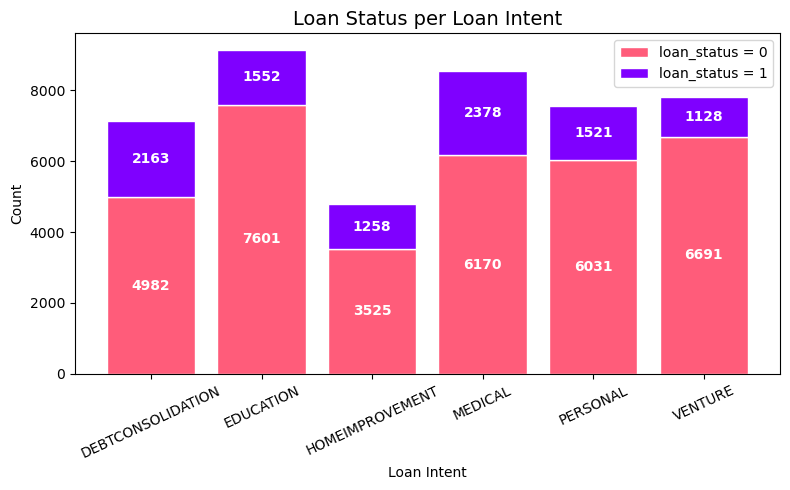

In [17]:
# Status Pengajuan berdasarkan Intensi Peminjaman

palette = ['#ff5c7a', '#ff4fa3', '#c43ac4', '#9b2cff', '#7f00ff']

crosstab = pd.crosstab(df["loan_intent"], df["loan_status"])

plt.figure(figsize=(8,5))
bottom = np.zeros(len(crosstab.index))

status_colors = {
    0: palette[0], 
    1: palette[-1]
}

for status in crosstab.columns:
    plt.bar(crosstab.index,crosstab[status].values,bottom=bottom,color=status_colors[status],label=f"loan_status = {status}",edgecolor="white")
    for i, value in enumerate(crosstab[status].values):
        if value > 0:
            plt.text(
                i,
                bottom[i] + value / 2,
                f"{value}",
                ha="center",
                va="center",
                color="white",
                fontsize=10,
                fontweight="bold"
            )
    bottom += crosstab[status].values
plt.title("Loan Status per Loan Intent",fontsize=14)
plt.xlabel("Loan Intent")
plt.ylabel("Count")
plt.xticks(rotation=25)
plt.legend()
plt.tight_layout()
plt.show()

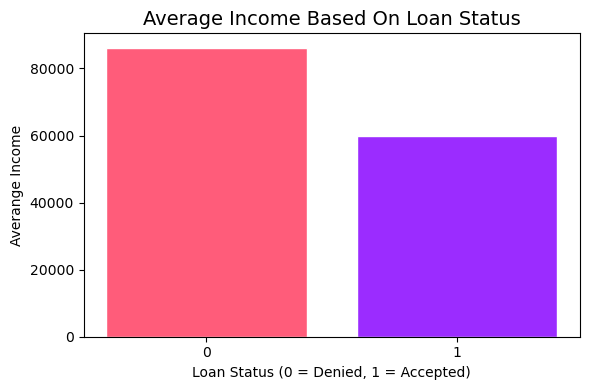

In [18]:
# Rata - Rata Penghasilan berdasarkan Loan Status

avg_income = df.groupby("loan_status")["person_income"].mean()
palette = ['#ff5c7a', '#9b2cff']

plt.figure(figsize=(6,4))
bars = plt.bar(avg_income.index.astype(str),avg_income.values,color=palette,edgecolor='white')
plt.title("Average Income Based On Loan Status", fontsize=14)
plt.xlabel("Loan Status (0 = Denied, 1 = Accepted)")
plt.ylabel("Averange Income")
plt.tight_layout()
plt.show()


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [20]:
df.to_excel('Loan Approval.xlsx', index=False)

<function matplotlib.pyplot.show(close=None, block=None)>

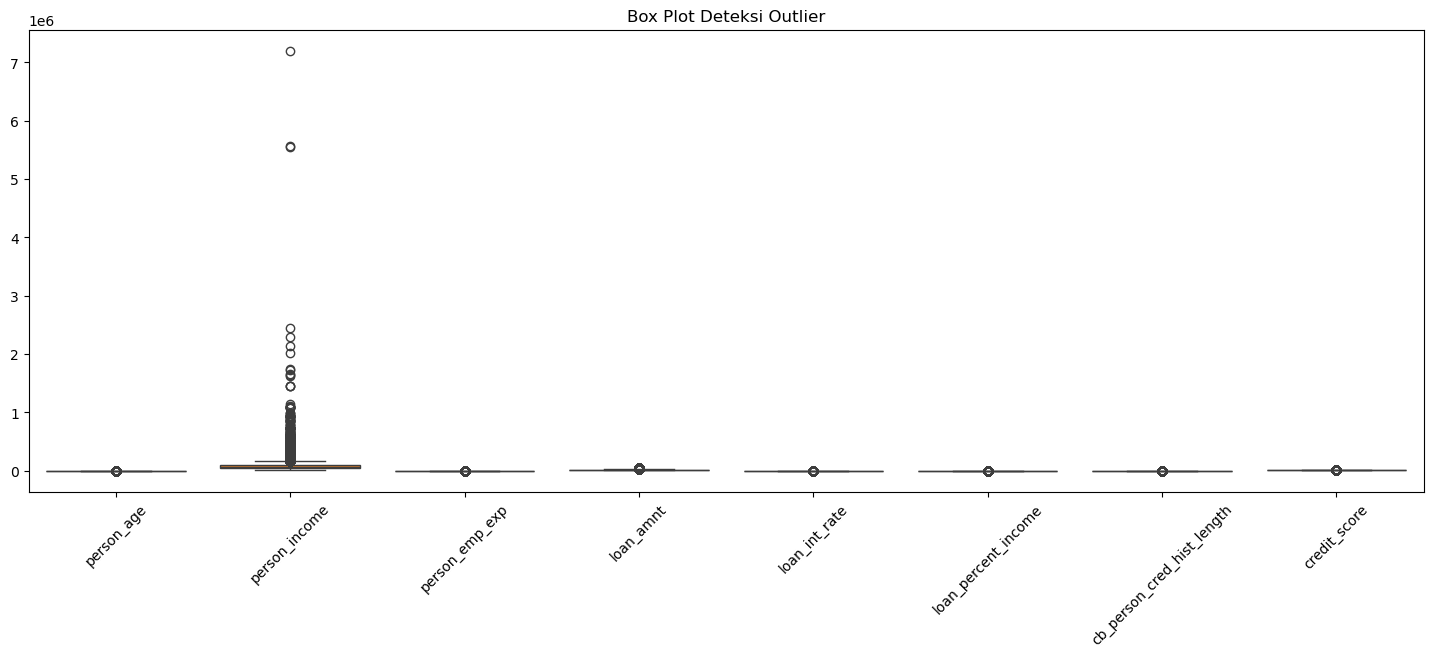

In [19]:
# Deteksi Outlier

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (18, 6))
sns.boxplot(data = df[numbers])
plt.title('Box Plot Deteksi Outlier')
plt.xticks(rotation = 45)
plt.show

In [20]:
# 5. Deteksi Outlier

# Mendeteksi dengan IQR
Q1 = df[numbers].quantile(0.25)
Q3 = df[numbers].quantile(0.75)
IQR = Q3 - Q1

# Filter baris outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_outlier = df[((df[numbers] < lower_bound) | (df[numbers] > upper_bound)).any(axis = 1)]
print('Data Outlier: ', df_outlier.shape[0], 'baris')

Data Outlier:  7451 baris


In [21]:
# Mendeteksi dengan IQR
Q1 = df[numbers].quantile(0.25)
Q3 = df[numbers].quantile(0.75)
IQR = Q3 - Q1

# Filter baris outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Data Sebelum: ', df.shape[0], 'baris')

# Hapus baris yang memiliki outlier disalah satu kolom numerik
df = df[~((df[numbers] < lower_bound) | (df[numbers] > upper_bound)).any(axis = 1)]

print('Data Sesudah: ', df.shape[0], 'baris')

Data Sebelum:  45000 baris
Data Sesudah:  37549 baris


In [22]:
categories

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

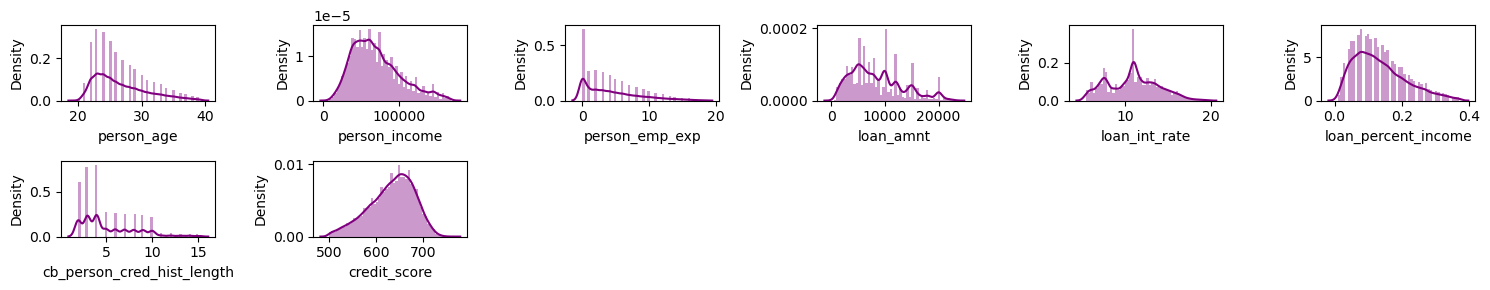

In [23]:
import matplotlib.pyplot as ply
import seaborn as sns
import math

plt.figure(figsize = (15, 3))
for i in range (0, len(numbers)):
    plt.subplot(math.ceil(len(numbers)/6), 6, i+1)
    sns.distplot(df[numbers[i]], color = 'purple')
    plt.tight_layout()

<Axes: >

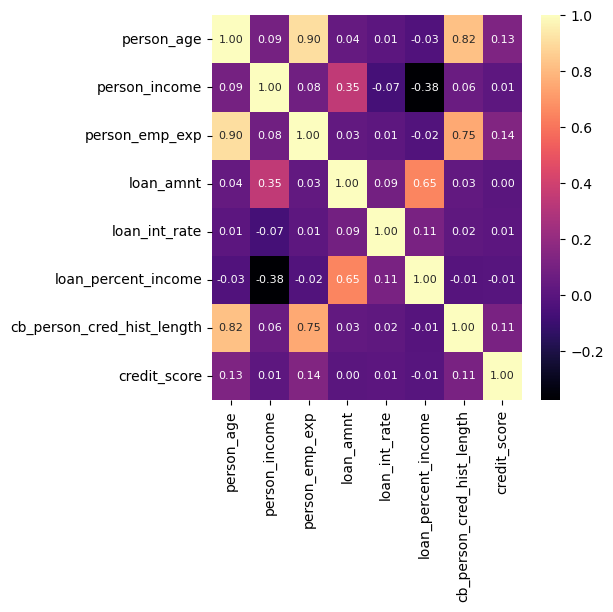

In [24]:
plt.figure(figsize = (5, 5))
sns.heatmap(df[numbers].corr(), cmap = 'magma', annot = True, fmt = '.2f', annot_kws = {'size': 8})

In [25]:
df = df.drop(columns = 'person_age')
# Membaca ulang kolom kategorik
numbers = df.select_dtypes(include=['number']).drop(columns=['loan_status']).columns
categories = df.select_dtypes(exclude = ['number']).columns

In [26]:
# Menyalin data yang telah dibersihkan
df_select = df.copy()
df_select.head()

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
5,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
9,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1
11,female,Associate,13113.0,0,OWN,4500.0,HOMEIMPROVEMENT,8.63,0.34,2.0,651,No,1
19,female,Master,14283.0,1,MORTGAGE,1750.0,EDUCATION,10.99,0.12,2.0,679,No,1


In [27]:
# Normalisasi Data dgn MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
for col in numbers:
    df_select[col] = MinMaxScaler().fit_transform(df_select[col].values.reshape(len(df_select),1))

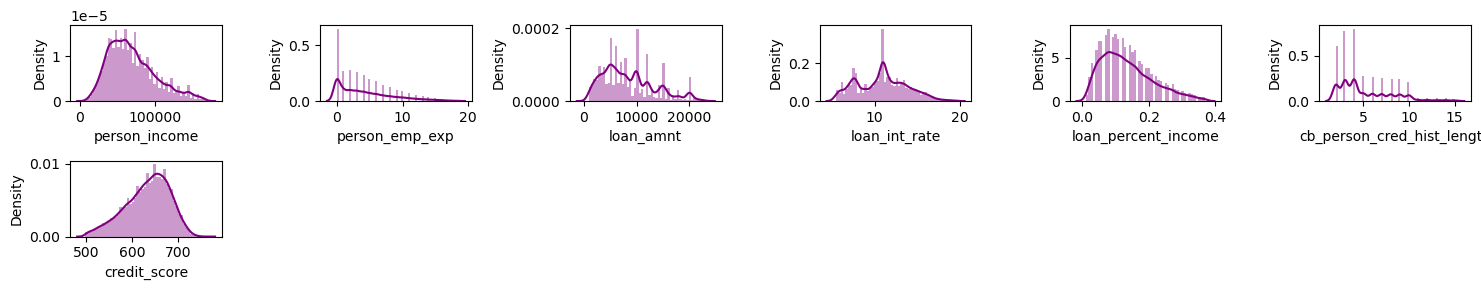

In [28]:
# Visualisasi Hasil Normalisasi dengan Densityplot
plt.figure(figsize = (15, 3))
for i in range (0, len(numbers)):
    plt.subplot(math.ceil(len(numbers)/6), 6, i+1)
    sns.distplot(df[numbers[i]], color = 'purple')
    plt.tight_layout()

In [29]:
df_select.head()

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,female,High School,0.026657,0.000000,OWN,0.022222,EDUCATION,0.405386,0.194444,0.000000,0.022727,Yes,0
5,female,High School,0.030822,0.000000,OWN,0.088889,VENTURE,0.121899,0.500000,0.000000,0.128788,No,1
9,female,High School,0.029502,0.000000,OWN,0.048889,VENTURE,0.660524,0.333333,0.076923,0.537879,No,1
11,female,Associate,0.031830,0.000000,OWN,0.177778,HOMEIMPROVEMENT,0.227498,0.916667,0.000000,0.579545,No,1
19,female,Master,0.039114,0.055556,MORTGAGE,0.055556,EDUCATION,0.394755,0.305556,0.000000,0.685606,No,1


In [30]:
# One-Hot Encoding
df_select = pd.get_dummies(df_select, columns = categories)
df_select.head()

,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_female,person_gender_male,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
1,0.026657,0.000000,0.022222,0.405386,0.194444,0.000000,0.022727,0,True,False,...,True,False,False,True,False,False,False,False,False,True
5,0.030822,0.000000,0.088889,0.121899,0.500000,0.000000,0.128788,1,True,False,...,True,False,False,False,False,False,False,True,True,False
9,0.029502,0.000000,0.048889,0.660524,0.333333,0.076923,0.537879,1,True,False,...,True,False,False,False,False,False,False,True,True,False
11,0.031830,0.000000,0.177778,0.227498,0.916667,0.000000,0.579545,1,True,False,...,True,False,False,False,True,False,False,False,True,False
19,0.039114,0.055556,0.055556,0.394755,0.305556,0.000000,0.685606,1,True,False,...,False,False,False,True,False,False,False,False,True,False


In [31]:
# Memisahkan Variable Bebas (X) dan Terikat (Y)
x = df_select.drop('loan_status', axis =1)
y = df_select['loan_status']

In [32]:
# Handle Class Imbalance
y.value_counts()

loan_status
0    29562
1     7987
Name: count, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi 8-% untuk training dan 20% untuk testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Hasil Split
print('Jumlah data train: ', len(x_train))
print('Jumlah data test: ', len(x_test))

Jumlah data train:  30039
Jumlah data test:  7510


In [34]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
x_train_balance, y_train_balance = sm.fit_resample(x_train, y_train)

In [35]:
y_train_balance.value_counts()

loan_status
0    23669
1    23669
Name: count, dtype: int64

In [36]:
print('Jumlah Data Train:', len(x_train_balance))
print('Jumlah Data Test:', len(y_train_balance))

Jumlah Data Train: 47338
Jumlah Data Test: 47338


## K-Nearest Neighbors (KNN)

In [37]:
# Tuning Hyperparameter KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# Inisiasi model KNN 
model_knn = KNeighborsClassifier()
param_dist = {
    'n_neighbors': range(1, 51),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

search = RandomizedSearchCV(model_knn, param_dist, n_iter = 30, cv = 5, scoring = 'accuracy')
search.fit(x_train, y_train)

print('Beast params: ', search.best_params_)

Beast params:  {'weights': 'distance', 'n_neighbors': 18, 'metric': 'manhattan'}


In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Inisiasi model KNN
model_knn = KNeighborsClassifier(n_neighbors = 3)

# Train model
model_knn.fit(x_train, y_train)

# Prediksi menggunakan data test
y_pred_knn = model_knn.predict(x_test)

train_accuracy_knn = model_knn.score(x_train, y_train)
print('Train Accuracy: ', train_accuracy_knn)

Train Accuracy:  0.9387462964812411


## Logistic Regression

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Inisiasi model Logistic Regression
model_logreg = LogisticRegression()

# Train model
model_logreg.fit(x_train, y_train)

# Prediksi menggunakan data test
y_pred_logreg = model_logreg.predict(x_test)

train_accuracy_logreg = model_logreg.score(x_train, y_train)
print('Train Accuracy: ', train_accuracy_logreg)

Train Accuracy:  0.8956023835680282


## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

# Inisiasi model Decision Tree
model_dt = DecisionTreeClassifier()

# Train model
model_dt.fit(x_train, y_train)

# Prediksi menggunakan data test
y_pred_dt = model_dt.predict(x_test)

train_accuracy_dt = model_dt.score(x_train, y_train)
print('Train Accuracy: ', train_accuracy_dt)

Train Accuracy:  1.0


## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi Model Random Forest
model_rf = RandomForestClassifier()

# Train Model
model_rf.fit(x_train, y_train)

# Prediksi Menggunakan Data Set
y_pred_rf = model_rf.predict(x_test)

train_accuracy_rf = model_rf.score(x_train, y_train)
print("Train Accuracy : ", train_accuracy_rf)

Train Accuracy :  1.0


## Support Vector Machine

In [42]:
# Support Vector Machine
from sklearn.svm import SVC

# Inisiasi Model SVM
model_svm = SVC()

# Train Model
model_svm.fit(x_train, y_train)

# Prediksi Menggunakan Data Test
y_pred_svm = model_svm.predict(x_test)

train_accuracy_svm = model_svm.score(x_train, y_train)
print("Train Accuracy : ", train_accuracy_svm)

Train Accuracy :  0.9143446852425181


## Naive-Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

# Inisiasi Model Naive Bayes
model_nb = GaussianNB()

# Train Model
model_nb.fit(x_train, y_train)

# Prediksi Menggunakan Data Test
y_pred_nb = model_nb.predict(x_test)

# Akurasi Data Train
train_accuracy_nb = model_nb.score(x_train, y_train)
print("Train Accuracy : ", train_accuracy_nb)

Train Accuracy :  0.7286527514231499


## Import Metrik Evaluasi

In [44]:
# Import Metrik Evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

## Logistic Regression

In [45]:
# Prediksi Pada Data Testing
y_pred_logreg = model_logreg.predict(x_test)

# Hitung Metrik Evaluasi
accuracy_logreg = accuracy_score(y_test,y_pred_logreg)
precision_logreg = precision_score(y_test,y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

roc_auc_logreg = roc_auc_score(y_test, model_logreg.predict_proba(x_test)[:,1])

## Decision Tree

In [46]:
# Prediksi Pada Data Testing
y_pred_dt = model_dt.predict(x_test)

# Hitung Metrik Evaluasi
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

roc_auc_dt = roc_auc_score(y_test, model_dt.predict_proba(x_test)[:,1])

## Random Forest

In [47]:
# Prediksi Pada Data Testing
y_pred_rf = model_rf.predict(x_test)

# Hitung Metrik Evaluasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

roc_auc_rf = roc_auc_score(y_test, model_rf.predict_proba(x_test)[:,1])

## Support Vector Machine

In [48]:
# Prediksi Pada Data Testing
y_pred_svm = model_svm.predict(x_test)

# Hitung Metrik Evaluasi
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

## K-Nearest Neighbor

In [49]:
# Prediksi Pada Data Testing
y_pred_svm = model_knn.predict(x_test)

# Hitung Metrik Evaluasi
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

## Naive-Bayes

In [50]:
# Prediksi Pada Data Testing
y_pred_nb = model_nb.predict(x_test)

# Hitung Metrik Evaluasi
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

## Rangkuman Hasil Evaluasi

In [56]:
df_evaluasi = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree', 'Random Forest',
              'Support Vector Machine', 'K-Nearest Neighbor', 'Naive-Bayes'],
    'Akurasi' : [accuracy_logreg, accuracy_dt, accuracy_rf,
                accuracy_svm, accuracy_knn, accuracy_nb],
    'Precision' : [precision_logreg, precision_dt, precision_rf,
                precision_svm, precision_knn, precision_nb],
    'Recall' : [recall_logreg, recall_dt, recall_rf,
                recall_svm, recall_knn, recall_nb],
    'F1 Score' : [f1_logreg, f1_dt, f1_rf,
                f1_svm, f1_knn, f1_nb]
})

# Dipanggil
df_evaluasi.head(6)

,Model,Akurasi,Precision,Recall,F1 Score
0,Logistic Regression,0.896005,0.768293,0.740260,0.754016
1,Decision Tree,0.895473,0.750905,0.769944,0.760305
2,Random Forest,0.925699,0.886779,0.750773,0.813128
3,Support Vector Machine,0.907057,0.817993,0.730983,0.772044
4,K-Nearest Neighbor,0.882690,0.754495,0.674706,0.712373
5,Naive-Bayes,0.732224,0.445700,1.000000,0.616587


## Confusion Matrix

In [57]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_nb = confusion_matrix(y_test, y_pred_nb)

<function matplotlib.pyplot.show(close=None, block=None)>

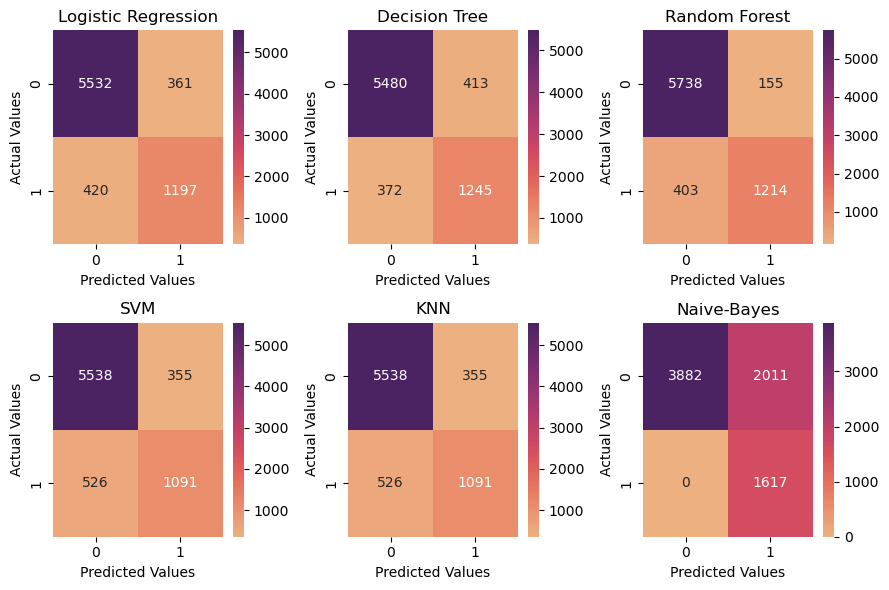

In [58]:
cm_list = [cm_logreg, cm_dt, cm_rf, cm_svm, cm_knn, cm_nb]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Naive-Bayes']
fig,axes = plt.subplots(2, 3, figsize = (9, 6))
for i in range (len(cm_list)) :
    row = i // 3
    col = i % 3
    sns.heatmap(cm_list[i], annot = True, cmap = 'flare', fmt='g', ax = axes[row, col])
    axes[row, col].set_title(model_names[i])
    axes[row, col].set_ylabel('Actual Values')
    axes[row, col].set_xlabel('Predicted Values')
plt.tight_layout()
plt.show